<a href="https://colab.research.google.com/github/MemerGamer/IntelligensModszerekTantargy/blob/main/Elofeldolgozas_es_vizualizacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline ### most nem kell, de maskor jol johet :-)

**Adatok betöltése**

In [2]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data_with_errors.txt', header=0, sep='\t')

In [3]:
data

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


**DataFrame oszlopai**

In [4]:
data['starttemp']  # egy oszlopra jol olvashatoan hivatkozhatunk az oszlop nevevel

,starttemp
0,17.0
1,19.0
2,30.0
3,29.0
4,30.0
...,...
98,21.0
99,16.0
100,17.0
101,15.0


In [5]:
list(data) # oszlopnevek listaja

['date',
 'starttime',
 'endtime',
 'starttemp',
 'endtemp',
 'air conditioner',
 'trafic',
 'route',
 'dist',
 'avg.cons.',
 'speed',
 'duration',
 'fuel type',
 'road',
 'num. persons']

**Hiányzó értékek (missing values)**

In [6]:
data['starttemp'].isnull()
# egy DataFrame típusú True-False vektort ad.
# Az ertek attol fuggoen True vagy False, hogy
# az adott peldany eeseteben a cella erteke null-e
# (azaz hianyzo ertek-e)

,starttemp
0,False
1,False
2,False
3,False
4,False
...,...
98,False
99,False
100,False
101,False


In [7]:
data['starttemp'].isnull().sum()
# összeadasnal: True=1, False=1
# Igy tehat a hianyzo ertekek szamat kapjuk

5

*1. feladat*

Írjon egy for ciklust, amely kiszámolja és kiírja a hiányzó értékek számát minden egyes attribútumra (oszlopra). A hiányzó értékek számával együtt az oszlop nevét is írja ki.

In [10]:
for column in data.columns:
  missing_count = data[column].isnull().sum()
  print(f"Column '{column}': {missing_count} missing values")


Column 'date': 0 missing values
Column 'starttime': 0 missing values
Column 'endtime': 0 missing values
Column 'starttemp': 5 missing values
Column 'endtemp': 4 missing values
Column 'air conditioner': 0 missing values
Column 'trafic': 0 missing values
Column 'route': 0 missing values
Column 'dist': 1 missing values
Column 'avg.cons.': 0 missing values
Column 'speed': 0 missing values
Column 'duration': 0 missing values
Column 'fuel type': 0 missing values
Column 'road': 0 missing values
Column 'num. persons': 0 missing values


*2. feladat*

Készítsen másolatot az adatról, és a másolatban helyettesítse a *starttemp* oszlop hiányzó értékeit

(a) a starttemp átlagos értékével,

(b) a starttemp mediánjával.

(c) Írjon egy for ciklust, amely az összes oszlop esetén helyettesíti a hiányzó értékeket az adott oszlop átlagával, ahol ez lehetséges!

In [14]:
# (a) starttemp átlagával való helyettesítés
data_copy_mean = data.copy()
mean_starttemp = data_copy_mean['starttemp'].mean()
data_copy_mean['starttemp'].fillna(mean_starttemp, inplace=True)
data_copy_mean

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


In [15]:
# (b) starttemp mediánjával való helyettesítés
data_copy_median = data.copy()
median_starttemp = data_copy_median['starttemp'].median()
data_copy_median['starttemp'].fillna(median_starttemp, inplace=True)
data_copy_median

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


In [16]:
# (c) Összes oszlop átlagával való helyettesítés (ahol lehetséges)
data_copy_all_mean = data.copy()
for column in data_copy_all_mean.columns:
    if pd.api.types.is_numeric_dtype(data_copy_all_mean[column]):
        mean_value = data_copy_all_mean[column].mean()
        data_copy_all_mean[column].fillna(mean_value, inplace=True)
data_copy_all_mean

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


A következőkben egy diagramon fogjuk ábrázolni az egyes utazások esetében az induláskori és érkezéskori hőmérsékletet. Csak azokat az utazásokat fogjuk használni, ahol az eredeti adatban mind a két hőmérsékleti érték adott. Először a scatterplottal ismerkedünk.

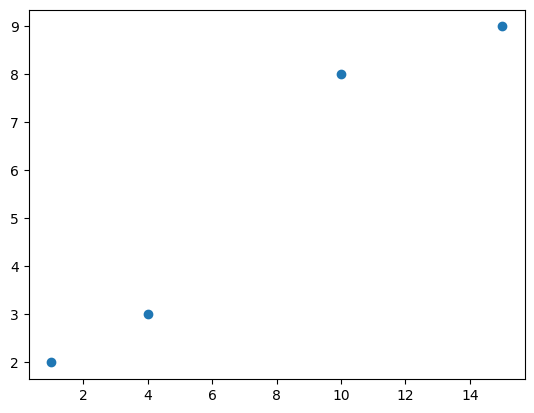

In [17]:
# 1 2
# 4 3
# 10 8
# 15 9
x = [1, 4, 10, 15]
y = [2, 3, 8, 9]
plt.scatter(x,y);

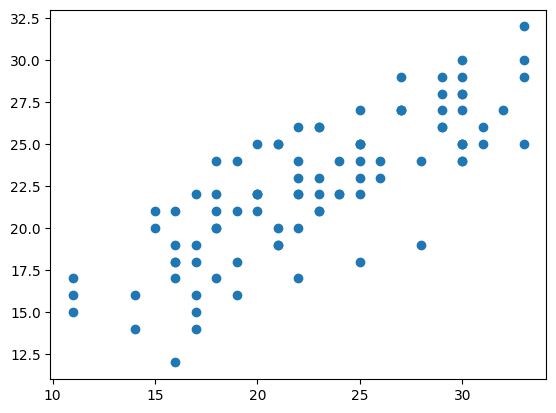

In [18]:
both_values_present = np.logical_and(data['starttemp'].isnull()==False,
                                     data['endtemp'].isnull()==False)
both_values_valid = np.logical_and(both_values_present, data['endtemp'] < 100)
plt.scatter( data[both_values_valid]['starttemp'],
            data[both_values_valid]['endtemp'] )
plt.show()

*3. feladat*

Az érkezéskori hőmérséklet jobb becslés lehet az indulási hőmérsékletre, mint az összes induláskori hőmérséklet átlaga, és fordítva: amikor az érkezéskori hőmérséklet hiányzik, az induláskori hőmérséklet lehet egy jó becslés.

(a) Írjon egy olyan kódot, amely ellenőrzi, hogy van-e olyan eset, amikor egyszerre hiányzik az induláskori és érkezéskori hőmérséklet!

(b) Amikor az **indulási** hőmérséklet hiányzik, helyettesítse azt az érkezéskori hőmérséklettel!

(c) Amikor csak az **érkezéskori** hőmérséklet hiányzik, helyettesítse azt az induláskori hőmérséklettel!


In [20]:
# (a) Ellenőrzés, hogy van-e olyan eset, amikor egyszerre hiányzik az induláskori és érkezéskori hőmérséklet
both_missing = data['starttemp'].isnull() & data['endtemp'].isnull()
if both_missing.any():
    print("Vannak olyan esetek, amikor mindkét hőmérséklet hiányzik.")
    print(f"Például a {data[both_missing].index[0]} indexű sorban.")
else:
    print("Nincs olyan eset, amikor mindkét hőmérséklet hiányzik.")


Nincs olyan eset, amikor mindkét hőmérséklet hiányzik.


In [24]:
# (b) Az indulási hőmérséklet hiányzó értékeinek helyettesítése az érkezéskori hőmérséklettel
data_filled = data.copy()
missing_start_indices = data_filled['starttemp'].isnull()
data_filled.loc[missing_start_indices, 'starttemp'] = data_filled.loc[missing_start_indices, 'endtemp']

In [22]:
# (c) Az érkezéskori hőmérséklet hiányzó értékeinek helyettesítése az induláskori hőmérséklettel
missing_end_indices = data_filled['endtemp'].isnull()
data_filled.loc[missing_end_indices, 'endtemp'] = data_filled.loc[missing_end_indices, 'starttemp']


In [25]:
# Ellenőrzés: Nincsenek-e még mindig hiányzó értékek (ideális esetben nem)
print("\nHiányzó értékek a módosított DataFrame-ben:")
print(data_filled.isnull().sum())



Hiányzó értékek a módosított DataFrame-ben:
date               0
starttime          0
endtime            0
starttemp          0
endtemp            4
air conditioner    0
trafic             0
route              0
dist               1
avg.cons.          0
speed              0
duration           0
fuel type          0
road               0
num. persons       0
dtype: int64


*4. feladat*

Lehetséges, hogy az indulási és érkezéskori hőmérséklet különbsége összefügg azzal, hogy mikor kerül sor az utazásra (reggel nagyobb az érkezéskori hőmérséklet, este pedig kisebb). A következőkben ezt fogjuk megvizsgálni.

(a) Vezessen be egy új oszlopot, ami a két hőmérséklet különbségét tartalmazza.

In [26]:
# (a) Új oszlop hozzáadása a hőmérséklet-különbséggel
data_filled['temp_diff'] = data_filled['endtemp'] - data_filled['starttemp']


(b) Vezessen be egy új oszlopot, ami azt tartalmazza számként, hogy a nap melyik órájában kerül sor az utazásra! Ezt az információt a *starttime* oszlopban található string első két karakteréből "hámozza ki".

In [27]:
# (b) Új oszlop hozzáadása az utazás órájával
data_filled['start_hour'] = data_filled['starttime'].str[:2].astype(int)


A következőkben csoportosítjuk az egyes utazásokat aszerint, hogy a nap melyik órájában kerül sor az utazásra, majd csoportonként kiszámoljuk az előbbiekben bevezetett *temp_diff* mediánját, amelyet az óra függvényében ábrázolunk.

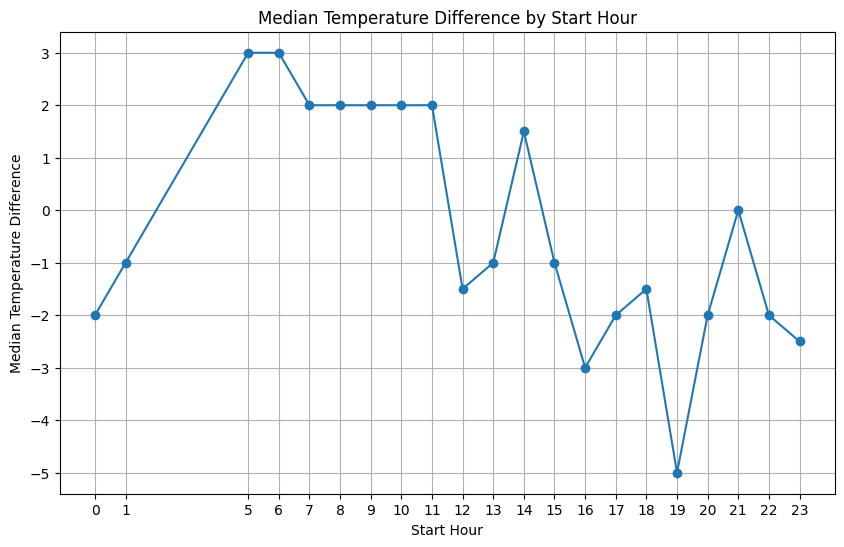

In [29]:
# soportosítjuk az egyes utazásokat aszerint, hogy a nap melyik órájában kerül sor az utazásra,
# majd csoportonként kiszámoljuk az előbbiekben bevezetett temp_diff mediánját
hourly_median_temp_diff = data_filled.groupby('start_hour')['temp_diff'].median()

# vizualizáció
plt.figure(figsize=(10, 6))
plt.plot(hourly_median_temp_diff.index, hourly_median_temp_diff.values, marker='o')
plt.xlabel('Start Hour')
plt.ylabel('Median Temperature Difference')
plt.title('Median Temperature Difference by Start Hour')
plt.grid(True)
plt.xticks(hourly_median_temp_diff.index)  # óra mutatása az x tengelyen
plt.show()


*5. feladat*

(a) Helyettesítse a **starttemp** hiányzó értékeit az **endtemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)!

In [33]:
hourly_median_temp_diff = data_filled.groupby('start_hour')['temp_diff'].median()

data_filled_corrected = data_filled.copy()

for index, row in data_filled[data_filled['starttemp'].isnull()].iterrows():
    start_hour = row['start_hour']
    median_diff = hourly_median_temp_diff.get(start_hour, 0)  # 0 ha nem talált
    data_filled_corrected.loc[index, 'starttemp'] = row['endtemp'] - median_diff

data_filled_corrected

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons,temp_diff,start_hour
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1,-2.0,0
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2,5.0,8
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3,-2.0,13
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1,-1.0,15
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1,-5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1,-2.0,22
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1,1.0,6
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1,-1.0,20
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1,5.0,8


(b) Helyettesítse az **endtemp** hiányzó értékeit a **starttemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)! Miben különbözik a megoldás az előbbi részfeladat megoldásától?

In [34]:
# (b) Helyettesítse az endtemp hiányzó értékeit a starttemp hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)! Miben különbözik a megoldás az előbbi részfeladat megoldásától?

for index, row in data_filled[data_filled['endtemp'].isnull()].iterrows():
    start_hour = row['start_hour']
    median_diff = hourly_median_temp_diff.get(start_hour, 0)  # 0 ha nem talált
    data_filled_corrected.loc[index, 'endtemp'] = row['starttemp'] + median_diff

data_filled_corrected


,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons,temp_diff,start_hour
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1,-2.0,0
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2,5.0,8
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3,-2.0,13
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1,-1.0,15
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1,-5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1,-2.0,22
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1,1.0,6
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1,-1.0,20
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1,5.0,8


*6. feladat*

Diszkusszió: hogyan töltené ki a távolság hiányzó értékét?

**Duplikátumok keresése**

*7. feladat*

Az úgynevezett **egzakt duplikátumok** (amikor pontosan ugyanaz a példány/rekord ismétlődik) eliminálása tipikusan két lépésben történik: az első lépésben az adatokat rendezzük, ezáltal a duplikátumok egymást követően helyezkednek el az adattáblában. A második lépésben az egymást követő példányokról döntjük el, hogy azonosak-e.
Az esetünkben az adattábla eredetileg is rendezett.

(a) Írjon egy olyan függvényt, amely az adattábla *i*-dik példányáról (*i* a függvény argumentuma) eldönti, hogy azonos-e az *(i+1)*-dik példánnyal.

In [37]:
# (a) Írjon egy olyan függvényt, amely az adattábla i-dik példányáról (i a függvény argumentuma) eldönti, hogy azonos-e az (i+1)-dik példánnyal.

def are_consecutive_rows_identical(data, i):
    if i + 1 >= len(data):
        return False  # i+1 index out of bounds

    row1 = data.iloc[i]
    row2 = data.iloc[i + 1]
    return row1.equals(row2)


(b) Az előbbi függvény felhasználásával írjon egy olyan szkriptet, amely az adattábla minden egyes példányáról eldönti, hogy megtartantó-e, azaz különbözik-e a következő példánytól. Eredményként egy True/False értékekből álló listát várunk, amelyben True azt jelöli, hogy a példányt megtartjuk, False pedig azt, hogy eldobjuk, mert egy másik példány azonos vele.

In [44]:
keep_rows = [not are_consecutive_rows_identical(data_filled_corrected, i) for i in range(len(data_filled_corrected))]
data_filled_corrected = data_filled_corrected[keep_rows]


A deduplikált adattábla:

In [46]:
data_dedup = pd.DataFrame(data[keep_rows])
data_dedup

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


**Inkonzisztens értékek**

*8. feladat*

(a) Vizsgálja meg, hogy az adattábla *air conditioner* oszlopa milyen értékeket vesz fel, melyiket hányszor. Segítség: használjon *groupby*-t és *count*-ot!

In [48]:
# (a) Vizsgálja meg, hogy az adattábla air conditioner oszlopa milyen értékeket vesz fel, melyiket hányszor. Segítség: használjon groupby-t és count-ot!
air_conditioner_counts = data_dedup.groupby('air conditioner')['air conditioner'].count()
air_conditioner_counts


,air conditioner
air conditioner,
off,53
offf,1
on,44
onn,1
oof,1


(b) Helyettesítse az "offf" értékeket "off"-fal!

In [51]:
data_dedup['air conditioner'] = data_dedup['air conditioner'].replace('offf', 'off')
data_dedup.groupby('air conditioner')['air conditioner'].count()

,air conditioner
air conditioner,
off,54
on,44
onn,1
oof,1


(c) Helyettesítse az "onn" értékeket "on"-nal!

In [52]:
data_dedup['air conditioner'] = data_dedup['air conditioner'].replace('onn', 'on')
data_dedup.groupby('air conditioner')['air conditioner'].count()

,air conditioner
air conditioner,
off,54
on,45
oof,1


(d) Helyettesítse az "oof" értékeket "off"-fal!

In [53]:
data_dedup['air conditioner'] = data_dedup['air conditioner'].replace('oof', 'off')
data_dedup.groupby('air conditioner')['air conditioner'].count()

,air conditioner
air conditioner,
off,55
on,45


**Leíró statisztikák**

Betöltjük a helyes adatokat:

In [54]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data.txt', header=0, sep='\t')

*9. feladat*

Számolja ki a kezdeti hőmérséklet

(a) minimumát és maximumát,

(b) 25%-os és 75%-os percentiliseit,

(c) és szórását!

(d) Írjon egy függvényt, amellyel bármelyik oszlop amplitúdója (maximumának és
    minimumának különbsége) meghatározható!

(e) Írjon egy függvényt, amely meghatározza az alsó és felső kvartilisek távolságát!

(Segítség: használja a numpy függvényeit!)

In [57]:
# (a) Minimum és maximum
min_starttemp = np.min(data['starttemp'])
max_starttemp = np.max(data['starttemp'])
print(f"Minimum kezdeti hőmérséklet: {min_starttemp}")
print(f"Maximum kezdeti hőmérséklet: {max_starttemp}")

Minimum kezdeti hőmérséklet: 11
Maximum kezdeti hőmérséklet: 33


In [58]:
# (b) 25%-os és 75%-os percentilisek
percentile_25 = np.percentile(data['starttemp'], 25)
percentile_75 = np.percentile(data['starttemp'], 75)
print(f"25%-os percentilis: {percentile_25}")
print(f"75%-os percentilis: {percentile_75}")

25%-os percentilis: 18.0
75%-os percentilis: 28.0


In [59]:
# (c) Szórás
std_dev_starttemp = np.std(data['starttemp'])
print(f"Szórás: {std_dev_starttemp}")

Szórás: 5.660388679233961


In [60]:
# (d) Függvény az amplitúdó kiszámításához
def amplitude(column):
    return np.max(column) - np.min(column)

# Példa használat:
print(f"Az 'starttemp' oszlop amplitúdója: {amplitude(data['starttemp'])}")



Az 'starttemp' oszlop amplitúdója: 22


In [61]:
# (e) Függvény a kvartilisek közötti távolság kiszámításához
def iqr(column):
    return np.percentile(column, 75) - np.percentile(column, 25)

# Példa használat:
print(f"Az 'starttemp' oszlop IQR-je: {iqr(data['starttemp'])}")

Az 'starttemp' oszlop IQR-je: 10.0


**Diagramok**

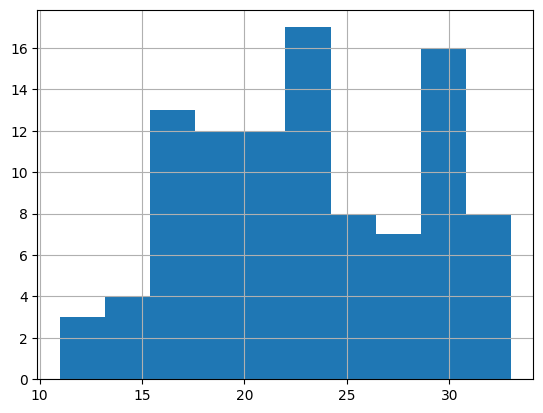

In [63]:
data["starttemp"].hist();

*10. feladat*

A "pandas DataFrame" dokumentációját és/vagy interneten elérhető forrásokat felhasználva módosítsa az előbbi kódot úgy, hogy a hisztogram oszlopainak száma ne 10, hanem 20 legyen!

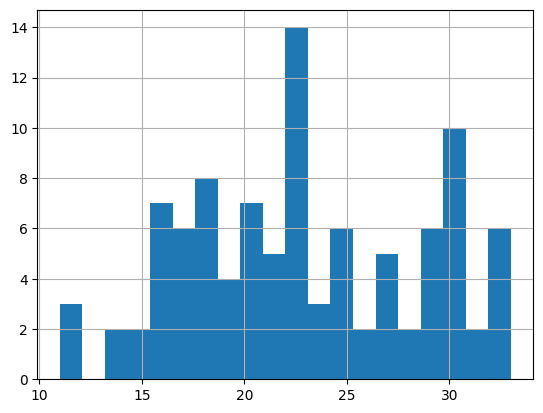

In [65]:
data["starttemp"].hist(bins=20);


*11. feladat*

Határozza meg, hány esetben volt a légkondi

(a) bekapcsolva (ac_on), illetve

(b) kikapcsolva (ac_off).

In [71]:
ac_on = data_dedup[data_dedup['air conditioner'] == 'on'].shape[0]
print(f"(a) Légkondi bekapcsolva: {ac_on} alkalommal")

(a) Légkondi bekapcsolva: 45 alkalommal


In [72]:

ac_off = data_dedup[data_dedup['air conditioner'] == 'off'].shape[0]
print(f"(b) Légkondi kikapcsolva: {ac_off} alkalommal")

(b) Légkondi kikapcsolva: 55 alkalommal


A következőkben a légkondi ki- és bekapcsoltságát fogjuk különböző diagramokon ábrázolni.

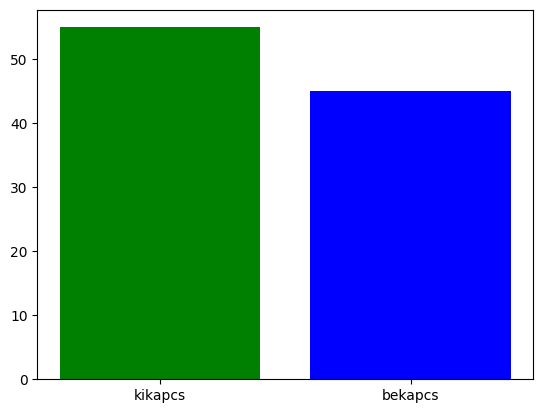

In [73]:
plt.bar([2,1], [ac_on, ac_off], tick_label=["bekapcs","kikapcs"], color=["b","g"]);

# plt.show() # most nem kell, de máskor jól jöhet :-)

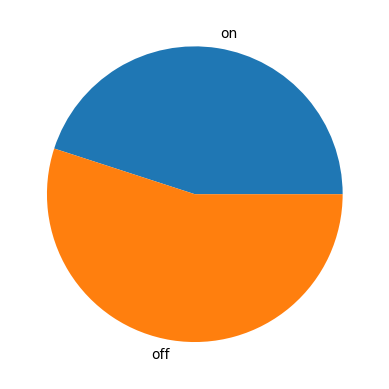

In [74]:
plt.pie( [ac_on, ac_off], labels=["on", "off"]);

Kezdőhőmérséklet eloszlása boxplot-on:

- középső vonal: median
- doboz teteje: felso kvartilis (75%-os percentilis)
- doboz alja: also kvartilis (25%-os percentilis)
- felső vonal: median + 1.5*(interquartile range), de legfeljebb a legnagyobb érték
- alsó vonal: median - 1.5*(interquartile range), de nem kisebb a legkisebb értéknél
- outlierek: karikák az alsó és felső vonal alatt ill. felett
- alsó és felső vonalnál az 1.5-ös szorzó állítható, ld. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html



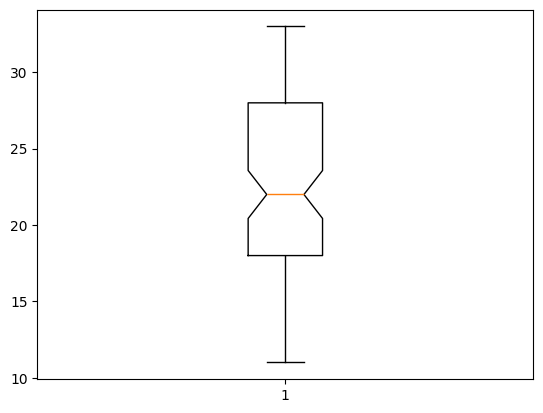

In [75]:
plt.boxplot(data['starttemp'], notch=True);

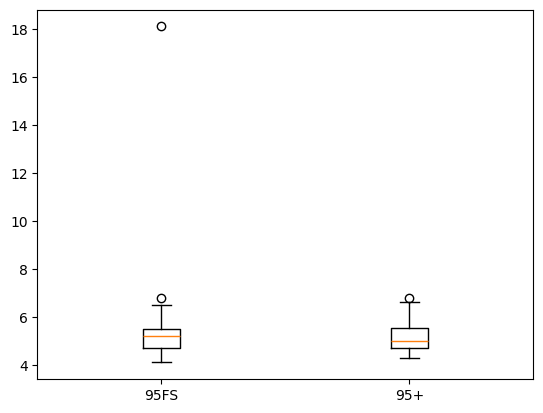

In [76]:
plt.boxplot([ data[data['fuel type'] =='95FS']['avg.cons.'],
              data[data['fuel type'] =='95+']['avg.cons.'] ],
              labels = ['95FS', '95+']);

**Szélsőséges értékek kezelése**

Egy egyszerű eljárás a szélsőséges értékek kezelésére: kihagyjuk őket. Felrajzoljuk példaként az előbbi boxplot-okat a 10l/100km-es fogyasztásnál nagyobb fogyasztásokat kihagyva.

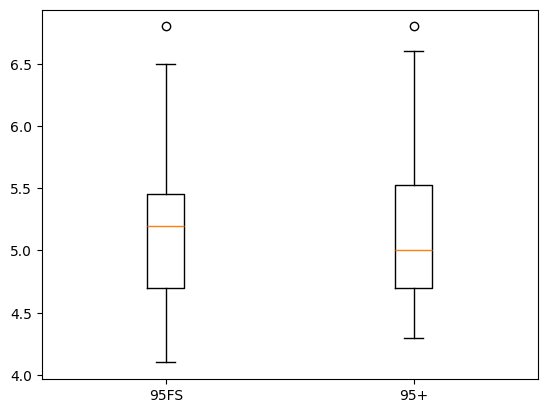

In [77]:
plt.boxplot([ data[(data['fuel type'] =='95FS') & (data['avg.cons.']<10)]['avg.cons.'],
              data[(data['fuel type'] =='95+')  & (data['avg.cons.']<10)]['avg.cons.'] ],
             labels = ['95FS', '95+']);

**Korreláció**

In [78]:
np.corrcoef(data['starttemp'], data['endtemp'])

array([[1.        , 0.81328617],
       [0.81328617, 1.        ]])

*12. feladat*

Írja meg azt a kódot, amely megadja kiszámolja a korrelációmátrixot a sebesség és az üzemanyagfogyasztás között!

In [80]:
correlation_matrix = np.corrcoef(data['speed'], data['avg.cons.'])
correlation_matrix


array([[ 1.        , -0.42431058],
       [-0.42431058,  1.        ]])

**Scatterplottól a többdimenziós ábrákig**

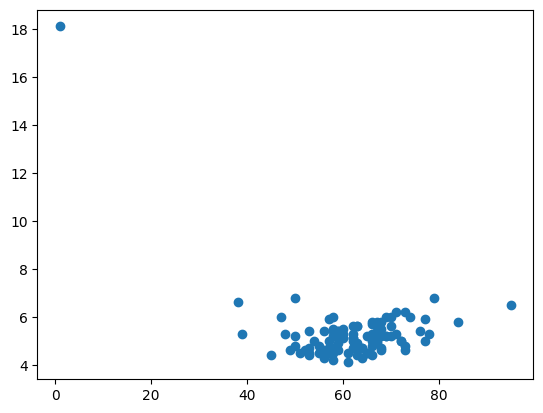

In [81]:
plt.scatter(data['speed'], data['avg.cons.']);

A következő ábrán színekkel jelöljük a forgalmi viszonyokat, de csak azokat az eseteket ábrázoljuk, ahol a fogyasztás 10l/100km alatti

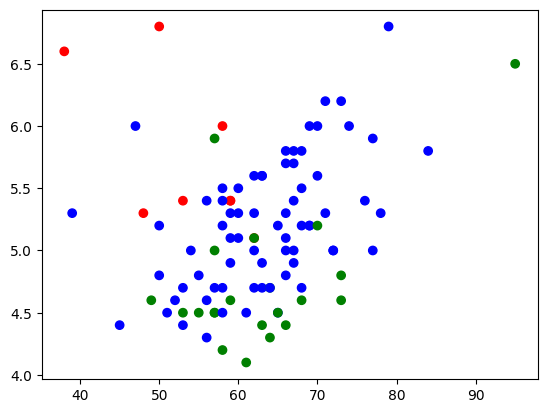

In [82]:
relevant_data = data[data['avg.cons.']<10]

colors = []
for tr in relevant_data['trafic']:
    if tr == 'low':
        colors.append('g')
    elif tr == 'normal':
        colors.append('b')
    else:
        colors.append('r')

plt.scatter(relevant_data['speed'],
            relevant_data['avg.cons.'],
            c = colors);

*13. feladat*

Hozzon létre egy új attribútumot (oszlopot), amely az átlagos hőmérsékletet (indulási és érkezéskori hőmérsékletek átlagát) tartalmazza!

In [83]:
data['temp'] = (data['starttemp'] + data['endtemp']) / 2


A következőkben egy 3D ábrán egyszerre fogjuk ábrázolni a sebességet, fogyasztást és a hőmérsékletet.

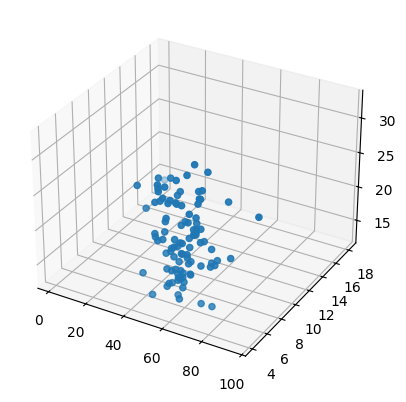

In [84]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'])
plt.show()



...szín segítségével megjelenítjük az üzemanyag típusát:



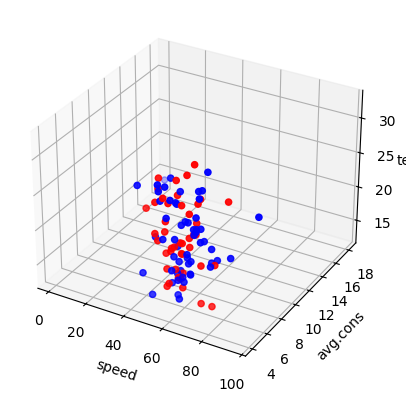

In [85]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else:
        colors.append('b')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'], c = colors)
ax.set_xlabel('speed')
ax.set_ylabel('avg.cons')
ax.set_zlabel('temp')
plt.show()

...a jelölő (marker) típusával pedig a forgalmi viszonyokat:

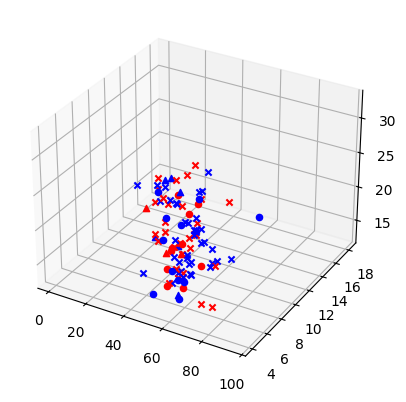

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
m=[]
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else:
        colors.append('b')

for j in range(len(data)):
    if data['trafic'][j] =='low':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = 'o')
    elif data['trafic'][j] =='normal':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = 'x')
    else:
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = '^')
plt.show()

**Összefoglalás**

Tipikus előfeldolgozási (adattiszttítási) lépések:
- Hiányzó értékek kezelése
- Duplikátumok eliminálása
- Inkonzisztens (hibás) értékek javítása
- Adatok kiválasztása: a későbbi elemzés szempontjából lényeges sorok=példányok=rekordok kiválasztása, valamint oszlopok=attribútumok=leírók=feature-k kiválasztása, új attribútumok létrehozása (pl. 'temp'), dimenzionalitás csökkentése (pl. PCA-val, nem volt róla szó).  
- Normalizálás (nem volt róla szó)
- Szélsőséges értékek keresése

Az előfeldolgozás közben (vagy akár előtte ill. utána is) hasznos az adatainkat ábrázolni, különféle leíró statisztikákat számolni, hogy minél jobban megértsük az adatokat.

Az előfeldolgozási lépések projektről-projektre változhatnak, mindig azt használjuk, ami az adott esetben ésszerű! Nem volt szó domain-specifikus előfeldolgozáról (pl. képek esetén azonos felbontásra alakításról).